In [5]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from celluloid import Camera

mp_drawing = mp.solutions.drawing_utils #for connections between points
mp_pose = mp.solutions.pose #pose algorithm

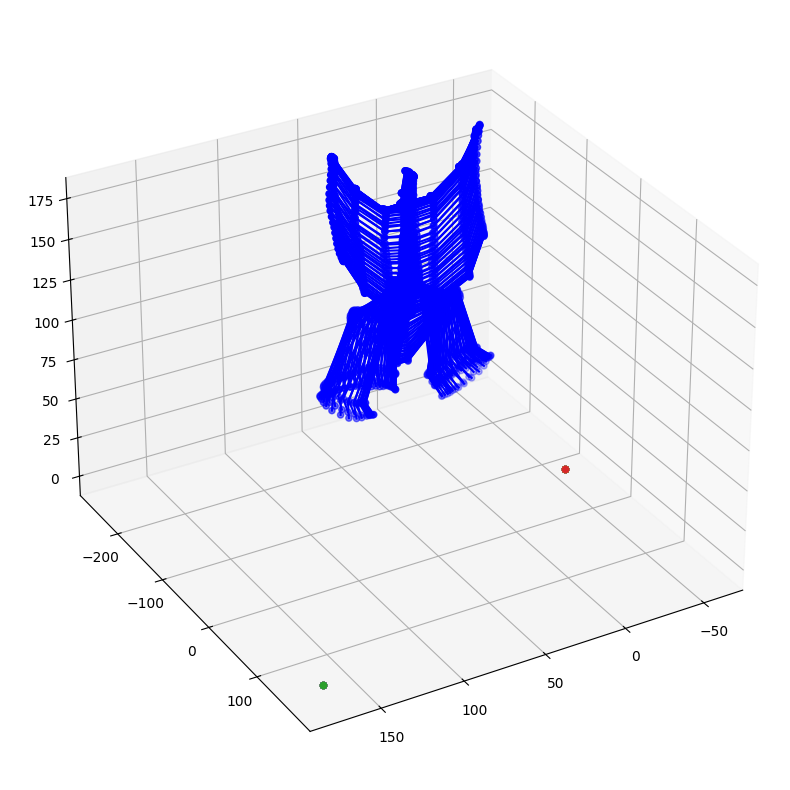

C:\Users\Yahia\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [21]:

def cartesian_frames(pos_file,ang_file):
    dfp = pd.read_csv(pos_file,sep=',')
    dfa = pd.read_csv(ang_file,sep=',')
    readpos = dfp.to_numpy()
    readang = dfa.to_numpy()

    for i in range(len(readpos[1, :])):
        readpos[:, i] = smooth(readpos[:, i], 5) #change last digit for smoothness

    for i in range(len(readang[1, :])):
        readang[:, i] = smooth(readang[:, i], 23) #change last digit for smoothness

    frames = np.shape(readpos)[0]
    skeleton_pos = np.zeros((22, 3, frames));
    skeleton_ang = np.zeros((22, 3, frames));

    tp = np.transpose(readpos)

    for i in range(frames):
        skeleton_pos[:, :, i] = tp[:, i].reshape((22, 3))

    ta = np.transpose(readang)
    for i in range(frames):
        skeleton_ang[:, :, i] = ta[:, i].reshape((22, 3))

    skel = np.zeros((22, 3, frames))
    rot = np.zeros((22, 3, frames))

    for i in range(frames):
        joint_pos = skeleton_pos[:, :, i]
        joint_ang = skeleton_ang[:, :, i]

        # chest,neck,head

        rot_1 = e2r(joint_ang[0, :].dot(np.pi / 180))
        joint_pos[1, :] = np.transpose(rot_1.dot(np.transpose(joint_pos[1, :]))) + joint_pos[0, :]

        rot_2 = rot_1.dot(e2r(joint_ang[1, :].dot(np.pi / 180)))
        joint_pos[2, :] = (np.transpose(rot_2.dot(np.transpose(joint_pos[2, :])))) + joint_pos[1, :]

        rot_3 = rot_2.dot(e2r(joint_ang[2, :].dot(np.pi / 180)))
        joint_pos[3, :] = (np.transpose(rot_3.dot(np.transpose(joint_pos[3, :])))) + joint_pos[2, :]

        rot_4 = rot_3.dot(e2r(joint_ang[3, :].dot(np.pi / 180)))
        joint_pos[4, :] = (np.transpose(rot_4.dot(np.transpose(joint_pos[4, :])))) + joint_pos[3, :]

        rot_5 = rot_4.dot(e2r(joint_ang[4, :].dot(np.pi / 180)))
        joint_pos[5, :] = (np.transpose(rot_5.dot(np.transpose(joint_pos[5, :])))) + joint_pos[4, :]

        # left arm
        rot_6 = e2r(joint_ang[2, :].dot(np.pi / 180))
        joint_pos[6, :] = (np.transpose(rot_6.dot(np.transpose(joint_pos[6, :])))) + joint_pos[2, :]

        rot_7 = rot_6.dot(e2r(joint_ang[6, :].dot(np.pi / 180)))
        joint_pos[7, :] = (np.transpose(rot_7.dot(np.transpose(joint_pos[7, :])))) + joint_pos[6, :]

        rot_8 = rot_7.dot(e2r(joint_ang[7, :].dot(np.pi / 180)))
        joint_pos[8, :] = (np.transpose(rot_8.dot(np.transpose(joint_pos[8, :])))) + joint_pos[7, :]

        rot_9 = rot_8.dot(e2r(joint_ang[8, :].dot(np.pi / 180)))
        joint_pos[9, :] = (np.transpose(rot_9.dot(np.transpose(joint_pos[9, :])))) + joint_pos[8, :]

        # right arm

        rot_10 = e2r(joint_ang[2, :].dot(np.pi / 180))
        joint_pos[10, :] = (np.transpose(rot_10.dot(np.transpose(joint_pos[10, :])))) + joint_pos[2, :]

        rot_11 = rot_10.dot(e2r(joint_ang[10, :].dot(np.pi / 180)))
        joint_pos[11, :] = (np.transpose(rot_11.dot(np.transpose(joint_pos[11, :])))) + joint_pos[10, :]

        rot_12 = rot_11.dot(e2r(joint_ang[11, :].dot(np.pi / 180)))
        joint_pos[12, :] = (np.transpose(rot_12.dot(np.transpose(joint_pos[12, :])))) + joint_pos[11, :]

        rot_13 = rot_12.dot(e2r(joint_ang[12, :].dot(np.pi / 180)))
        joint_pos[13, :] = (np.transpose(rot_13.dot(np.transpose(joint_pos[13, :])))) + joint_pos[12, :]

        # left leg
        rot_14 = e2r(joint_ang[0, :].dot(np.pi / 180))
        joint_pos[14, :] = (np.transpose(rot_14.dot(np.transpose(joint_pos[14, :])))) + joint_pos[0, :]

        rot_15 = rot_14.dot(e2r(joint_ang[14, :].dot(np.pi / 180)))
        joint_pos[15, :] = (np.transpose(rot_15.dot(np.transpose(joint_pos[15, :])))) + joint_pos[14, :]

        rot_16 = rot_15.dot(e2r(joint_ang[15, :].dot(np.pi / 180)))
        joint_pos[16, :] = (np.transpose(rot_16.dot(np.transpose(joint_pos[16, :])))) + joint_pos[15, :]

        rot_17 = rot_16.dot(e2r(joint_ang[16, :].dot(np.pi / 180)))
        joint_pos[17, :] = (np.transpose(rot_17.dot(np.transpose(joint_pos[17, :])))) + joint_pos[16, :]

        # right leg
        rot_18 = e2r(joint_ang[0, :].dot(np.pi / 180))
        joint_pos[18, :] = (np.transpose(rot_18.dot(np.transpose(joint_pos[18, :])))) + joint_pos[0, :]

        rot_19 = rot_18.dot(e2r(joint_ang[18, :].dot(np.pi / 180)))
        joint_pos[19, :] = (np.transpose(rot_19.dot(np.transpose(joint_pos[19, :])))) + joint_pos[18, :]

        rot_20 = rot_19.dot(e2r(joint_ang[19, :].dot(np.pi / 180)))
        joint_pos[20, :] = (np.transpose(rot_20.dot(np.transpose(joint_pos[20, :])))) + joint_pos[19, :]

        rot_21 = rot_20.dot(e2r(joint_ang[20, :].dot(np.pi / 180)))
        joint_pos[21, :] = (np.transpose(rot_21.dot(np.transpose(joint_pos[21, :])))) + joint_pos[20, :]

        skel[:, :, i] = joint_pos

    return frames,skel
def e2r(x):
    g = x[0]
    b = x[1]
    a = x[2]
    R = rotz(a).dot(roty(b)).dot(rotx(g))
    return R
def rotx(t):
    ct = math.cos(t)
    st = math.sin(t)
    r = [[1, 0, 0],
         [0, ct, -st],
         [0, st, ct]]

    return np.array(r)
def roty(t):
    ct = math.cos(t)
    st = math.sin(t)
    r = [[ct, 0, st],
         [0, 1, 0],
         [-st, 0, ct]]

    return np.array(r)
def rotz(t):
    ct = math.cos(t)
    st = math.sin(t)
    r = [[ct, -st, 0],
         [st, ct, 0],
         [0, 0, 1]]

    return np.array(r)
def smooth(a,WSZ):
    # a: NumPy 1-D array containing the data to be smoothed
    # WSZ: smoothing window size needs, which must be odd number,
    # as in the original MATLAB implementation
    out0 = np.convolve(a,np.ones(WSZ,dtype=int),'valid')/WSZ
    r = np.arange(1,WSZ-1,2)
    start = np.cumsum(a[:WSZ-1])[::2]/r
    stop = (np.cumsum(a[:-WSZ:-1])[::2]/r)[::-1]
    return np.concatenate((  start , out0, stop  ))

def main():
    ##### this is the part where the number of frames in the excercise and the skeleton is returned
    pos = "D:\\graduation project\\ui-prmd\\Segmented Movements\\Kinect\\Positions\\m01_s01_e01_positions.txt"
    angles = "D:\\graduation project\\ui-prmd\\Segmented Movements\\Kinect\\Angles\\m01_s01_e01_angles.txt"
    frames, skel = cartesian_frames(pos, angles)
    #########

    J = [[1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
         [4, 7], [7, 8], [8, 9], [9, 10],
         [4, 11], [11, 12], [12, 13], [13, 14],
         [1, 19], [19, 20], [20, 21], [21, 22],
         [1, 15], [15, 16], [16, 17], [17, 18]]

    J = np.array(J) - 1

    maxX, minX = skel[:, 0, :].max(), skel[:, 0, 0].min()
    maxY, minY = skel[:, 1, :].max(), skel[:, 0, 0].min()
    # maxZ,minZ=skel[:,2,:].max(),skel[:,0,0].min()

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    camera = Camera(fig)
    for i in range(frames):
        x = skel[:, 0, i]
        y = skel[:, 1, i]
        z = skel[:, 2, i]

        ax.scatter(maxY, maxY)
        ax.scatter(minY, minY)
        ax.scatter(x, z, y, c='b')

        for p in J:
            p1, p2 = p[0], p[1]
            ax.plot([x[p1], x[p2]], [z[p1], z[p2]], [y[p1], y[p2]], c='b')

        ax.view_init(30, 60)
        camera.snap()
    animation = camera.animate()
    plt.show()

main()



In [55]:
# results.pose_landmarks
# len(landmarks)

In [56]:
# for lndmrk in mp_pose.PoseLandmark:
#     print(lndmrk)

In [57]:
# landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

In [58]:
# landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

In [59]:
# landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

In [60]:
def calculate_angle(a,b,c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

In [61]:
cap = cv2.VideoCapture(0) # open the camera

counter = 0
stage = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #recoloring the image to RGB
        results = pose.process(image) #make detection
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #recolor back to BGR

        try:
            landmarks = results.pose_landmarks.landmark

            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            angle = calculate_angle(shoulder, elbow, wrist)

            # cv2.putText(image, str(angle),
            # tuple(np.multiply(elbow[640,480]).astype(int)),
            # cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
            #      )

            if angle > 160:
                stage = "down"
            if angle < 45 and stage == "down":
                stage="up"
                counter += 1
                print(counter)

        except:
            pass

        cv2.rectangle(image,(0,0),(235,73),(245,117,16), -1)

        cv2.putText(image,"reps", (15,12),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
            (10,60),
            cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)
        cv2.putText(image, "stage", (75,12),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
            (80,60),
            cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)


        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=4, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=4)
                                     )
        cv2.imshow('revive test', image)
        if cv2.waitKey(10) == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1


In [52]:
# shoulder, elbow, wrist

In [20]:
# calculate_angle(shoulder, elbow, wrist)

16.88767397211458

In [39]:
# cv2.putText(image, str(angle),
#             tuple(np.multiply(elbow[640,480]).astype(int)),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
#                  )
            
            

In [40]:
# counter = 0
# stage = None

# if angle > 160:
#     stage = "down"
# if angle < 45 and stage == "down":
#     stage="up"
#     counter += 1
#     print(counter)

In [41]:
# cv2.rectangle(image,(0,0),(235,73),(245,117,16), -1)

# cv2.putText(image,"reps", (15,12),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
# cv2.putText(image, str(counter),
#             (10,60),
#             cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)
# cv2.putText(image, "stage", (75,12),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
# cv2.putText(image, stage,
#             (80,60),
#             cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)


In [42]:
# cap = cv2.VideoCapture(0) # open the camera

# counter = 0
# stage = None

# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#     while cap.isOpened():
#         ret, frame = cap.read()

#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #recoloring the image to RGB
#         results = pose.process(image) #make detection
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #recolor back to BGR

#         try:
#             landmarks = results.pose_landmarks.landmark

#             shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
#             elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
#             wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

#             angle = calculate_angle(shoulder, elbow, wrist)

#             cv2.putText(image, str(angle),
#             tuple(np.multiply(elbow[640,480]).astype(int)),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
#                  )

#             if angle > 160:
#                 stage = "down"
#             if angle < 45 and stage == "down":
#                 stage="up"
#                 counter += 1
#                 print(counter)

#         except:
#             pass

#         cv2.rectangle(image,(0,0),(235,73),(245,117,16), -1)

#         cv2.putText(image,"reps", (15,12),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, str(counter),
#             (10,60),
#             cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)
#         cv2.putText(image, "stage", (75,12),
#             cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
#         cv2.putText(image, stage,
#             (80,60),
#             cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255, 255),2, cv2.LINE_AA)


#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                   mp_drawing.DrawingSpec(color=(245,117,66), thickness=4, circle_radius=2),
#                                   mp_drawing.DrawingSpec(color=(245,66,230), thickness=4)
#                                      )
#         cv2.imshow('revive test', image)
#         if cv2.waitKey(10) == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()
